<!--  -->

# Predict iris flowers categories using 03 different classifiers

# Import modules

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import pickle

import os
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [162]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [163]:
# delete the Id column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Explore the dataset

In [164]:
# display the statistics of the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [165]:
#some basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [166]:
# the number of samples on each class
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [167]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

### Histograms

<AxesSubplot:>

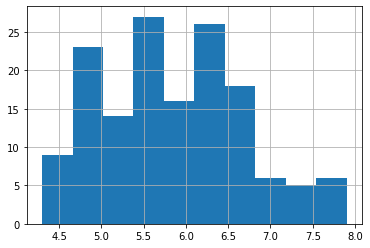

In [168]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

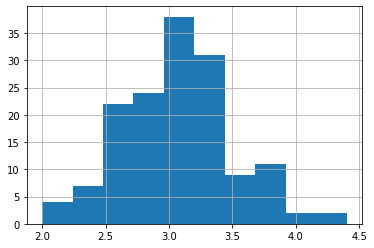

In [169]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

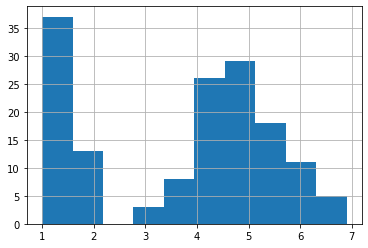

In [170]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

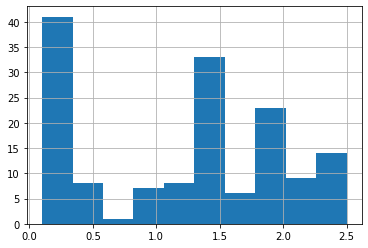

In [171]:
df['PetalWidthCm'].hist()

### Scatterplots

In [172]:
colors = ['red', 'green', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

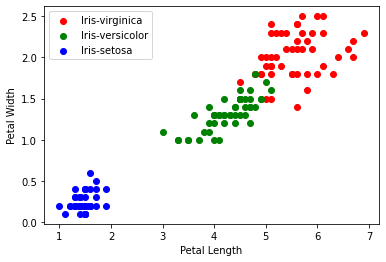

In [173]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

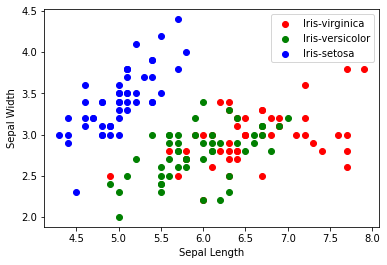

In [174]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

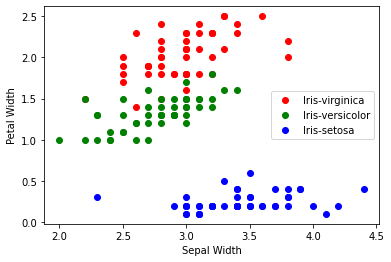

In [175]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

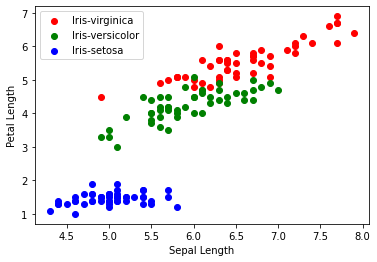

In [176]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

# Coorelation Matrix

A correlation matrix is a table showing correlation coefficients between variables.

If two varibles have high correlation, we can neglect one variable from those two.

In [177]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

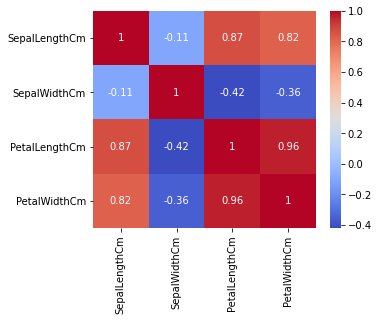

In [178]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

## Label Encoder



In [179]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [180]:
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [181]:
models=[ RandomForestClassifier(), LogisticRegression(),  DecisionTreeClassifier()]
accuracy_train=[]
accuracy_test=[]
pickles=[]

for model in models :
    model.fit(x_train, y_train)
    accuracy_train.append(np.round(model.score(x_train, y_train) * 100, decimals=1))
    accuracy_test.append(np.round(model.score(x_test, y_test) * 100, decimals=1))
    pickle.dump(model, open('model'+ str(models.index(model)) + '.pkl', 'wb'))

In [182]:
models_names=[ 'RandomForestClassifier', 'LogisticRegression',  
              'DecisionTreeClassifier']
cols = ['accuracy_train', 'accuracy_test']
data = pd.DataFrame(columns=cols, index=list(models_names))
data['accuracy_train']=accuracy_train
data['accuracy_test']=accuracy_test
data

,accuracy_train,accuracy_test
RandomForestClassifier,100.0,93.3
LogisticRegression,99.0,93.3
DecisionTreeClassifier,100.0,93.3


In [183]:
models[0].predict(x_test)

array([0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2,
       2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2,
       2])

<!--  -->

<!--  -->

<!--  -->

<!--  -->